## RealTime Simulation in a Jupyter Notebook

This section will discuss how realtime-simulation and live plotting can be done in a Jupyter Notebook. Hence, this page is an extension of the documentation for the `Live Plotting of Data During the Simulation` example. We will base ourselves on the `SinGen` class as given below:

In [1]:
from CBD.Core import CBD
from CBD.lib.std import TimeBlock, GenericBlock
from CBD.lib.endpoints import SignalCollectorBlock

class SinGen(CBD):
    def __init__(self, name="SinGen"):
        CBD.__init__(self, name, input_ports=[], output_ports=[])

        # Create the blocks
        self.addBlock(TimeBlock("time"))
        self.addBlock(GenericBlock("sin", block_operator="sin"))
        self.addBlock(SignalCollectorBlock("collector"))

        # Connect the blocks
        self.addConnection("time", "sin")
        self.addConnection("sin", "collector")

Now, let's set up the `PlotManager` and our corresponding `Simulator`:

<IPython.core.display.Javascript object>


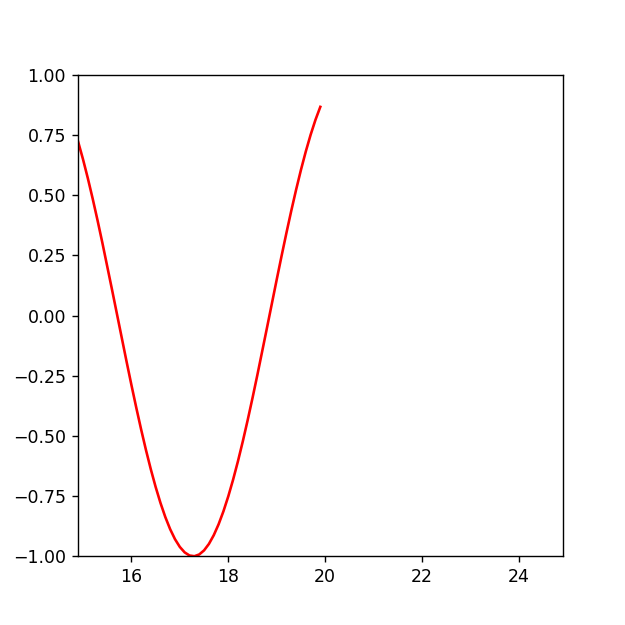

In [2]:
%matplotlib notebook

from CBD.realtime.plotting import PlotManager, LinePlot, follow
from CBD.simulator import Simulator
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(5, 5), dpi=100)
ax = fig.add_subplot(111)
ax.set_ylim((-1, 1))    # The sine wave never exceeds this range

sinGen = SinGen("SinGen")


manager = PlotManager()
manager.register("sin", sinGen.find('collector')[0], (fig, ax), LinePlot(color='red'))
manager.connect('sin', 'update', lambda d, axis=ax: axis.set_xlim(follow(d[0], 10.0, lower_bound=0.0)))

sim = Simulator(sinGen)
sim.setRealTime()
sim.setDeltaT(0.1)
sim.connect("finished", manager.terminate)  # make sure manager stops polling for data at simulation end
sim.run(20.0)

plt.show()

And that's it!